 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [7]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [8]:
whale_path = Path("./Resources/whale_returns.csv")
wp = pd.read_csv(whale_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
wp.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [9]:
# Count nulls
wp.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [10]:
# Drop nulls
wp.dropna(inplace=True)

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [11]:
# Reading algorithmic returns
algo_path = Path("./Resources/algo_returns.csv")
ap = pd.read_csv(algo_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
ap.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [12]:
# Count nulls
ap.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [13]:
# Drop nulls
ap.dropna(inplace=True)

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [14]:
# Reading S&P 500 Closing Prices
sp_path = Path("./Resources/sp500_history.csv")
sp = pd.read_csv(sp_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
sp.sort_index(inplace=True)
sp.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [15]:
# Check Data Types
sp.dtypes

Close    object
dtype: object

In [16]:
# Fix Data Types
sp['Close'] = sp['Close'].str.replace('$', '', regex = True)
sp['Close'] = sp['Close'].astype('float')
sp.dtypes

Close    float64
dtype: object

In [17]:
# Calculate Daily Returns
sp_returns = sp.pct_change()

In [18]:
# Drop nulls
sp_returns.dropna(inplace=True)

In [19]:
# Rename `Close` Column to be specific to this portfolio.
sp_returns = sp_returns.rename(columns = {'Close':'S&P 500'})

## Combine Whale, Algorithmic, and S&P 500 Returns

In [20]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
df_returns = pd.concat([wp, ap, sp_returns], axis = "columns", join = "inner")

---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<Axes: xlabel='Date'>

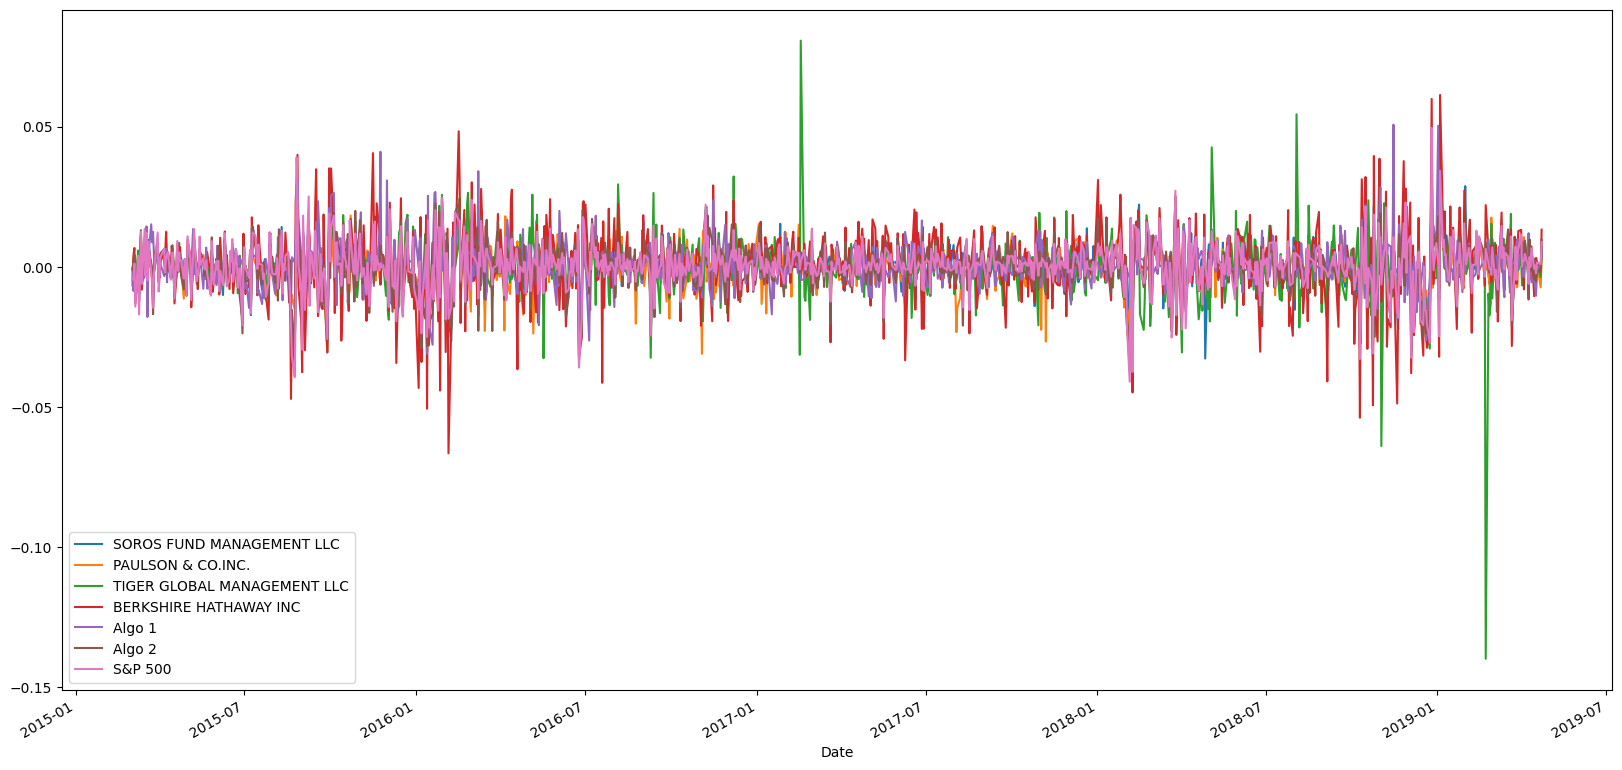

In [21]:
# Plot daily
df_returns.plot(figsize = (20,10))

#### Calculate and Plot cumulative returns.

<Axes: xlabel='Date'>

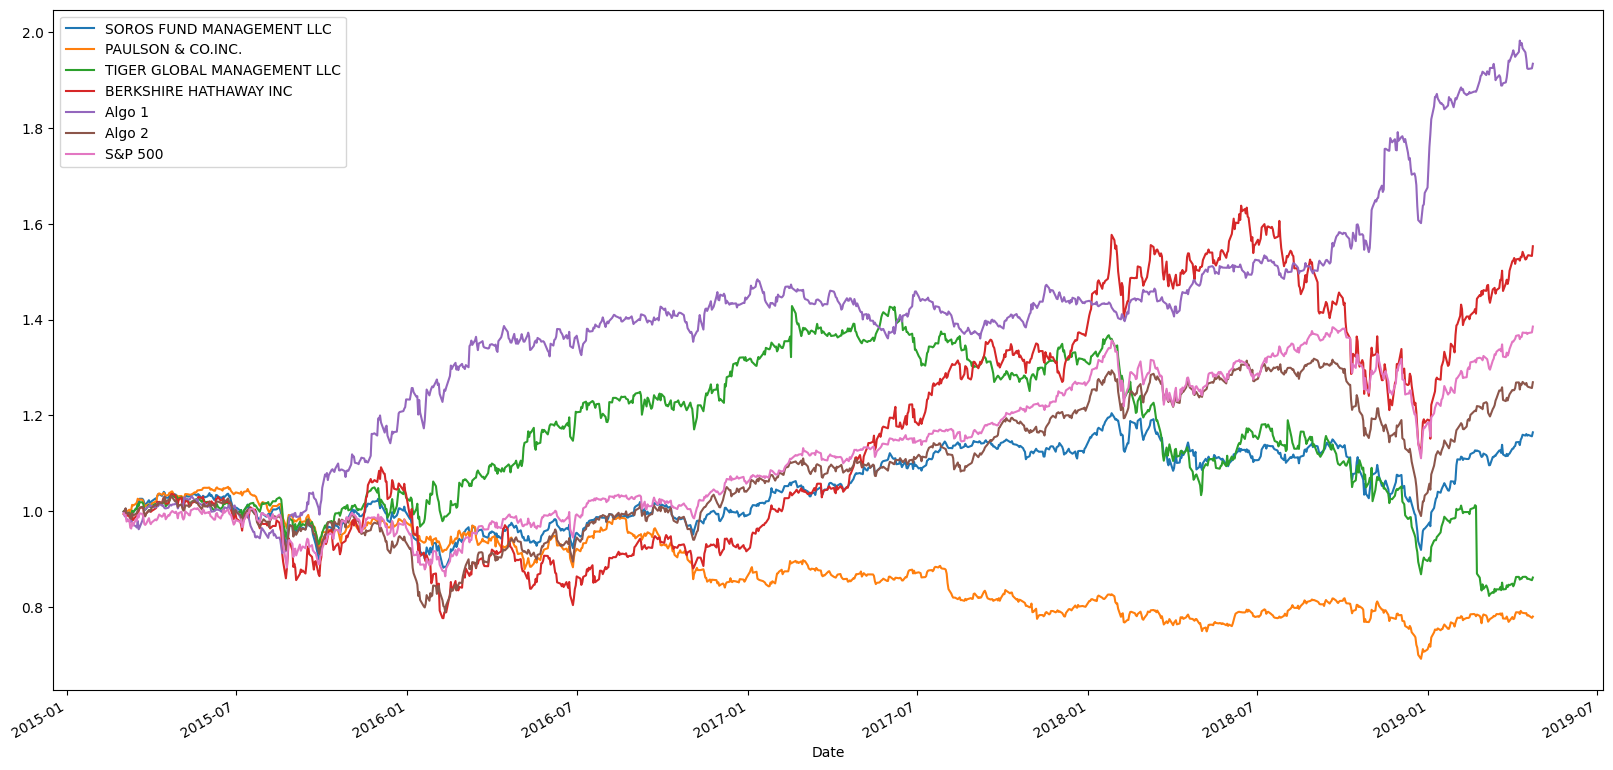

In [22]:
# Calculate cumulative returns of all portfolios
df_returns_cum = (1+ df_returns).cumprod()
# Plot cumulative returns
df_returns_cum.plot(figsize = (20,10))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<Axes: >

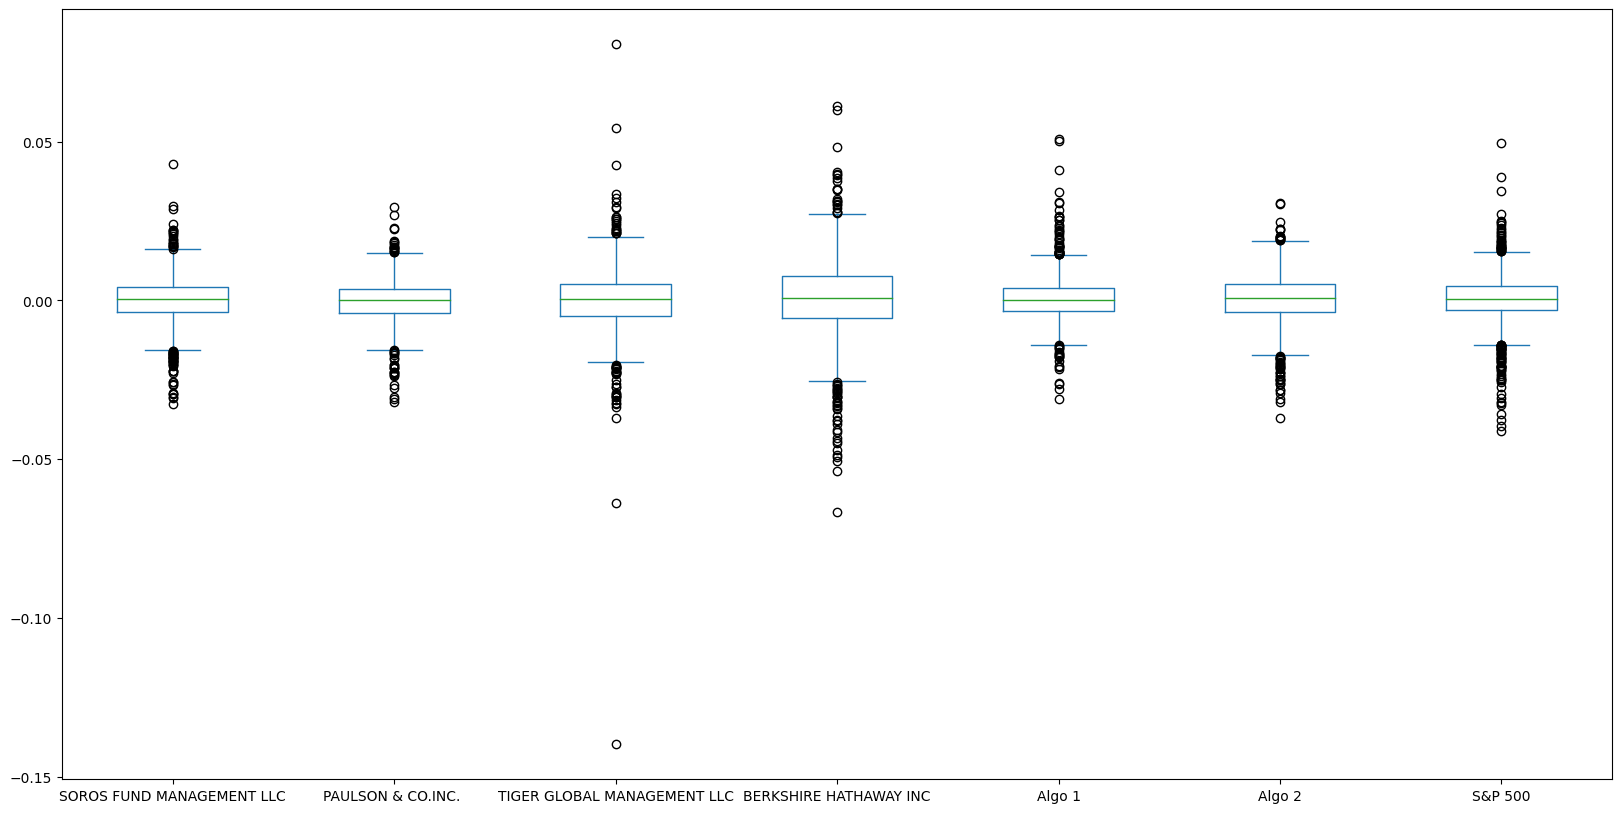

In [23]:
# Box plot to visually show risk
df_returns.plot(kind = "box", figsize = (20,10))

### Calculate Standard Deviations

In [24]:
# Calculate the daily standard deviations of all portfolios
df_returns_std = df_returns.std()
df_returns_std

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
S&P 500                        0.008554
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [25]:
# Calculate  the daily standard deviation of S&P 500
sp_500_daily_std = df_returns["S&P 500"].std()
df_returns_std > sp_500_daily_std

SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                         False
Algo 2                         False
S&P 500                        False
dtype: bool

In [26]:
# Determine which portfolios are riskier than the S&P 500
print(f"Portfolios that have more rsik then S&P 500 - BERKSHIRE HATHAWAY INC, TIGER GLOBAL MANAGEMENT LLC")

Portfolios that have more rsik then S&P 500 - BERKSHIRE HATHAWAY INC, TIGER GLOBAL MANAGEMENT LLC


### Calculate the Annualized Standard Deviation

In [27]:
# Calculate the annualized standard deviation (252 trading days)
ann_std = df_returns.std() * np.sqrt(252)
ann_std

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
S&P 500                        0.135786
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<Axes: xlabel='Date'>

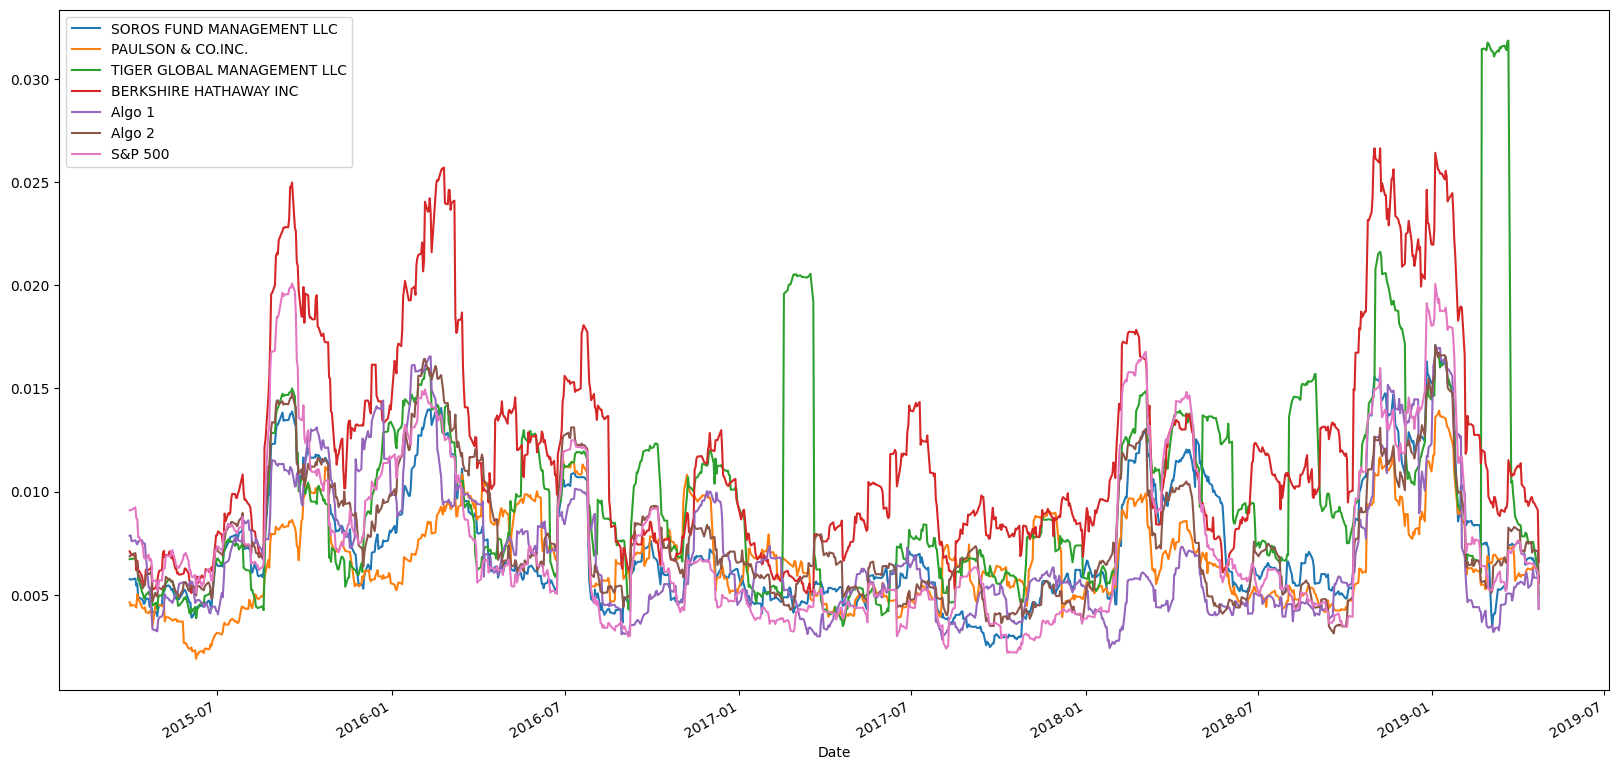

In [28]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
df_returns_std21=df_returns.rolling(window=21).std()
# Plot the rolling standard deviation
df_returns_std21.plot(figsize=(20,10))

### Calculate and plot the correlation

<Axes: >

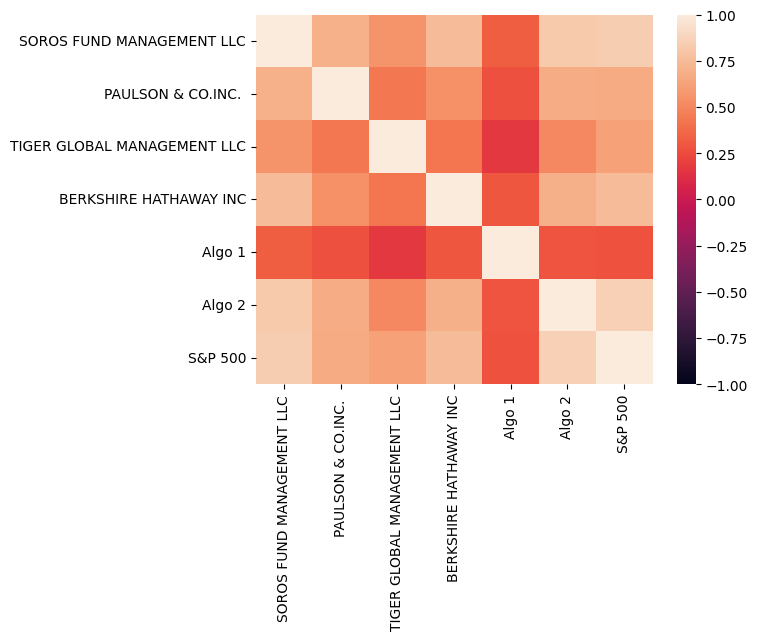

In [29]:
# Calculate the correlation
correlation = df_returns.corr()
# Display de correlation matrix
sns.heatmap(correlation, vmin=-1, vmax=1)

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<Axes: xlabel='Date'>

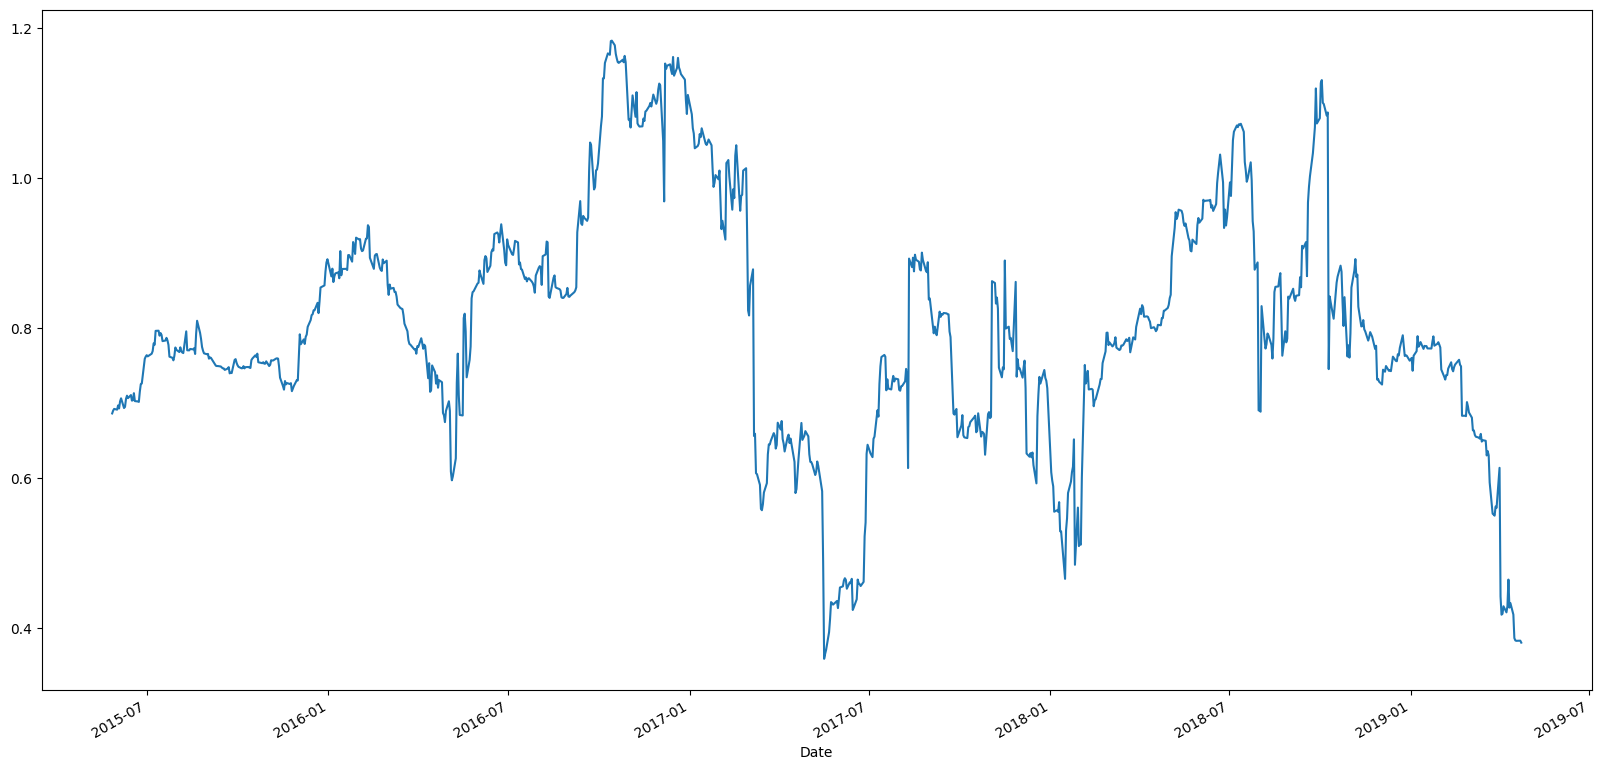

In [30]:
# Calculate covariance of a single portfolio
roll_covariance_TIGER_GLOBAL_MANAGEMENT = df_returns['TIGER GLOBAL MANAGEMENT LLC'].rolling(window=60).cov(df_returns["S&P 500"])
# Calculate variance of S&P 500
roll_variance = df_returns["S&P 500"].rolling(window=60).var()
# Computing beta
roll_beta_TIGER_GLOBAL_MANAGEMENT = roll_covariance_TIGER_GLOBAL_MANAGEMENT/ roll_variance
# Plot beta trend
roll_beta_TIGER_GLOBAL_MANAGEMENT.plot(figsize=(20,10))

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

<Axes: xlabel='Date'>

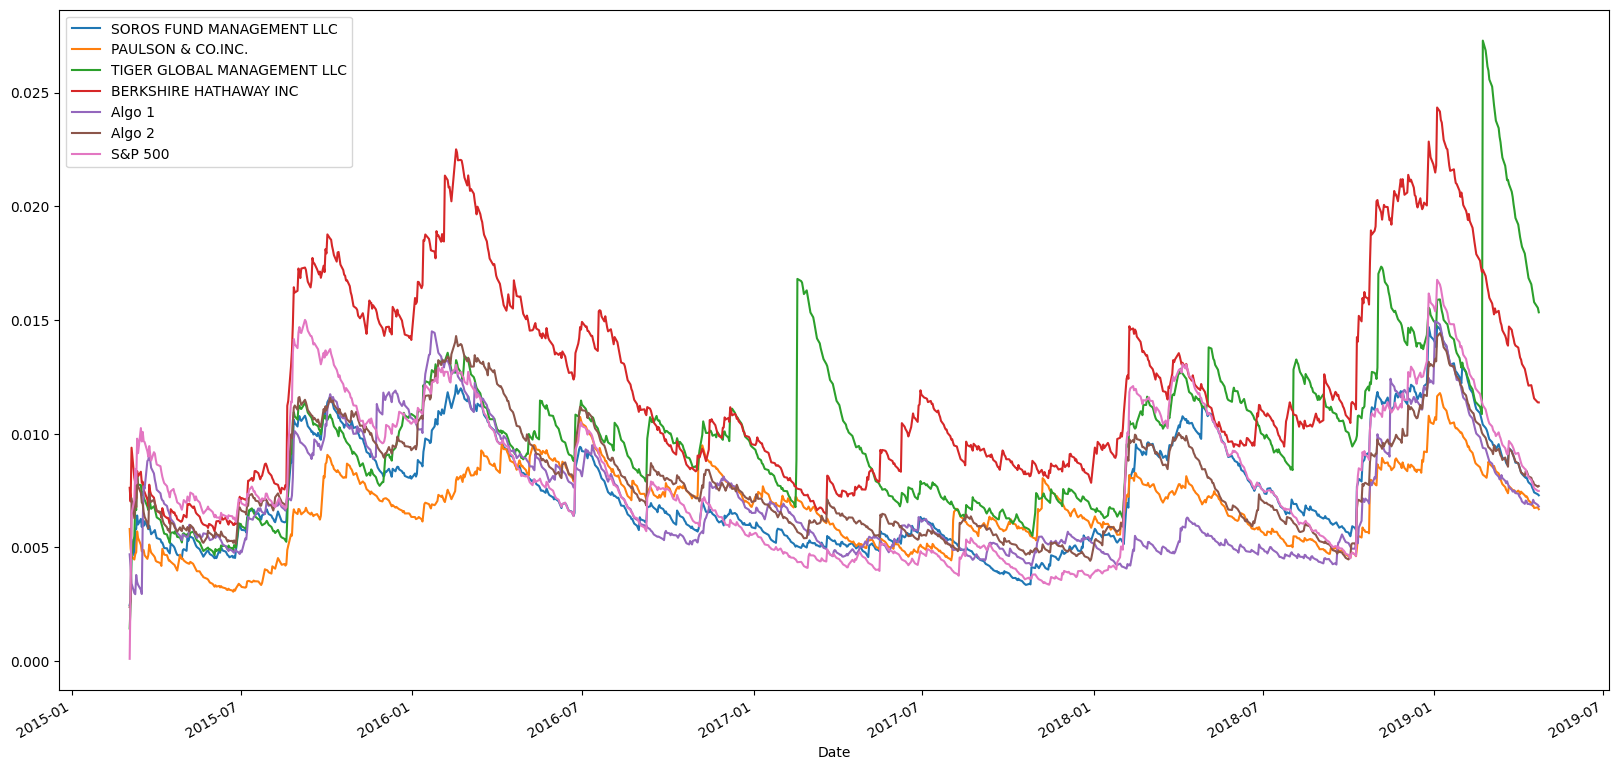

In [31]:
# Use `ewm` to calculate the rolling window
ewm_std = df_returns.ewm(halflife=21).std()
ewm_std.plot(figsize=(20,10))

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [32]:
# Annualized Sharpe Ratios
sharpe_ratios = (df_returns.mean() * 252) / (df_returns.std() * np.sqrt(252))

<Axes: >

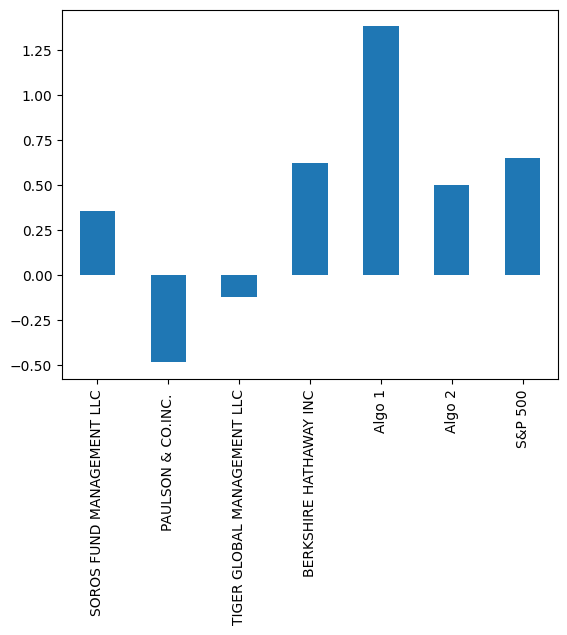

In [33]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar")

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!
The only protfolio that did better then the S&P 500 was ALGO 1, but was in correlation with BHI.

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [34]:
# Reading data from 1st stock
google_stock_csv = Path("./Resources/goog_historical.csv")
gogs = pd.read_csv(google_stock_csv, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
gogs.head()

,Symbol,NOCP
Trade DATE,,
2019-05-09,GOOG,1162.38
2019-05-08,GOOG,1166.27
2019-05-07,GOOG,1174.10
2019-05-06,GOOG,1189.39
2019-05-03,GOOG,1185.40


In [35]:
# Reading data from 2nd stock
costco_stock_csv = Path("./Resources/cost_historical.csv")
costcos = pd.read_csv(costco_stock_csv, index_col="Trade DATE", parse_dates=True, infer_datetime_format=True)
costcos.head()

,Symbol,NOCP
Trade DATE,,
2019-05-09,COST,243.47
2019-05-08,COST,241.34
2019-05-07,COST,240.18
2019-05-06,COST,244.23
2019-05-03,COST,244.62


In [36]:
# Reading data from 3rd stock
aapl_stock_csv = Path("./Resources/aapl_historical.csv")
appls = pd.read_csv(aapl_stock_csv, index_col="Trade DATE", parse_dates=True, infer_datetime_format=True)
appls.head()

,Symbol,NOCP
Trade DATE,,
2019-05-09,AAPL,200.72
2019-05-08,AAPL,202.90
2019-05-07,AAPL,202.86
2019-05-06,AAPL,208.48
2019-05-03,AAPL,211.75


In [37]:
# Combine all stocks in a single DataFrame
port_df=pd.concat([gogs, costcos, appls], axis = "rows", join = "inner")
port_df.head()

,Symbol,NOCP
Trade DATE,,
2019-05-09,GOOG,1162.38
2019-05-08,GOOG,1166.27
2019-05-07,GOOG,1174.10
2019-05-06,GOOG,1189.39
2019-05-03,GOOG,1185.40


In [38]:
# Reset Date index
#port_df.columns = ["GOOG","GOOG Close","COST", "COST Close","AAPL", "APPL Close"]
port_df = port_df.reset_index()
port_df.head()

,Trade DATE,Symbol,NOCP
0,2019-05-09,GOOG,1162.38
1,2019-05-08,GOOG,1166.27
2,2019-05-07,GOOG,1174.10
3,2019-05-06,GOOG,1189.39
4,2019-05-03,GOOG,1185.40


In [39]:
# Reorganize portfolio data by having a column per symbol
portfolio_df_2 = port_df.pivot_table(values='NOCP',index='Trade DATE',columns='Symbol')
portfolio_df_2.head()

Symbol,AAPL,COST,GOOG
Trade DATE,,,
2018-05-11,188.59,195.76,1098.26
2018-05-14,188.15,195.88,1100.20
2018-05-15,186.44,195.48,1079.23
2018-05-16,188.18,198.71,1081.77
2018-05-17,186.99,199.60,1078.59


In [40]:
# Calculate daily returns
daily_returns = portfolio_df_2.pct_change()
# Drop NAs
daily_returns = daily_returns.dropna()
# Display sample data
daily_returns

Symbol,AAPL,COST,GOOG
Trade DATE,,,
2018-05-14,-0.002333,0.000613,0.001766
2018-05-15,-0.009088,-0.002042,-0.019060
2018-05-16,0.009333,0.016523,0.002354
2018-05-17,-0.006324,0.004479,-0.002940
2018-05-18,-0.003637,-0.003206,-0.011339
...,...,...,...
2019-05-03,0.012431,0.007953,0.019602
2019-05-06,-0.015443,-0.001594,0.003366
2019-05-07,-0.026957,-0.016583,-0.012855


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [41]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
port_return = daily_returns.dot(weights)
# Display sample data
port_return

Trade DATE
2018-05-14    0.000015
2018-05-15   -0.010064
2018-05-16    0.009403
2018-05-17   -0.001595
2018-05-18   -0.006061
                ...   
2019-05-03    0.013329
2019-05-06   -0.004557
2019-05-07   -0.018798
2019-05-08   -0.000547
2019-05-09   -0.001751
Length: 249, dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [42]:
# Join your returns DataFrame to the original returns DataFrame
df_returns["Custom"] = port_return

df_returns.tail()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Custom
Date,,,,,,,,
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509,0.000340
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274,0.009292
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579,0.001545
2019-04-22,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,0.001012,0.001217
2019-04-23,0.007167,0.003485,0.006472,0.013278,0.004969,0.009622,0.008841,0.011959


In [43]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
df_returns.isnull().sum().dropna()
df_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Custom
Date,,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539,NaN
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389,NaN
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196,NaN
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174,NaN
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944,NaN


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [44]:
# Calculate the annualized `std`
port_annual_std = df_returns.std()*np.sqrt(252)
port_annual_std

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
S&P 500                        0.135786
Custom                         0.211496
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<Axes: xlabel='Date'>

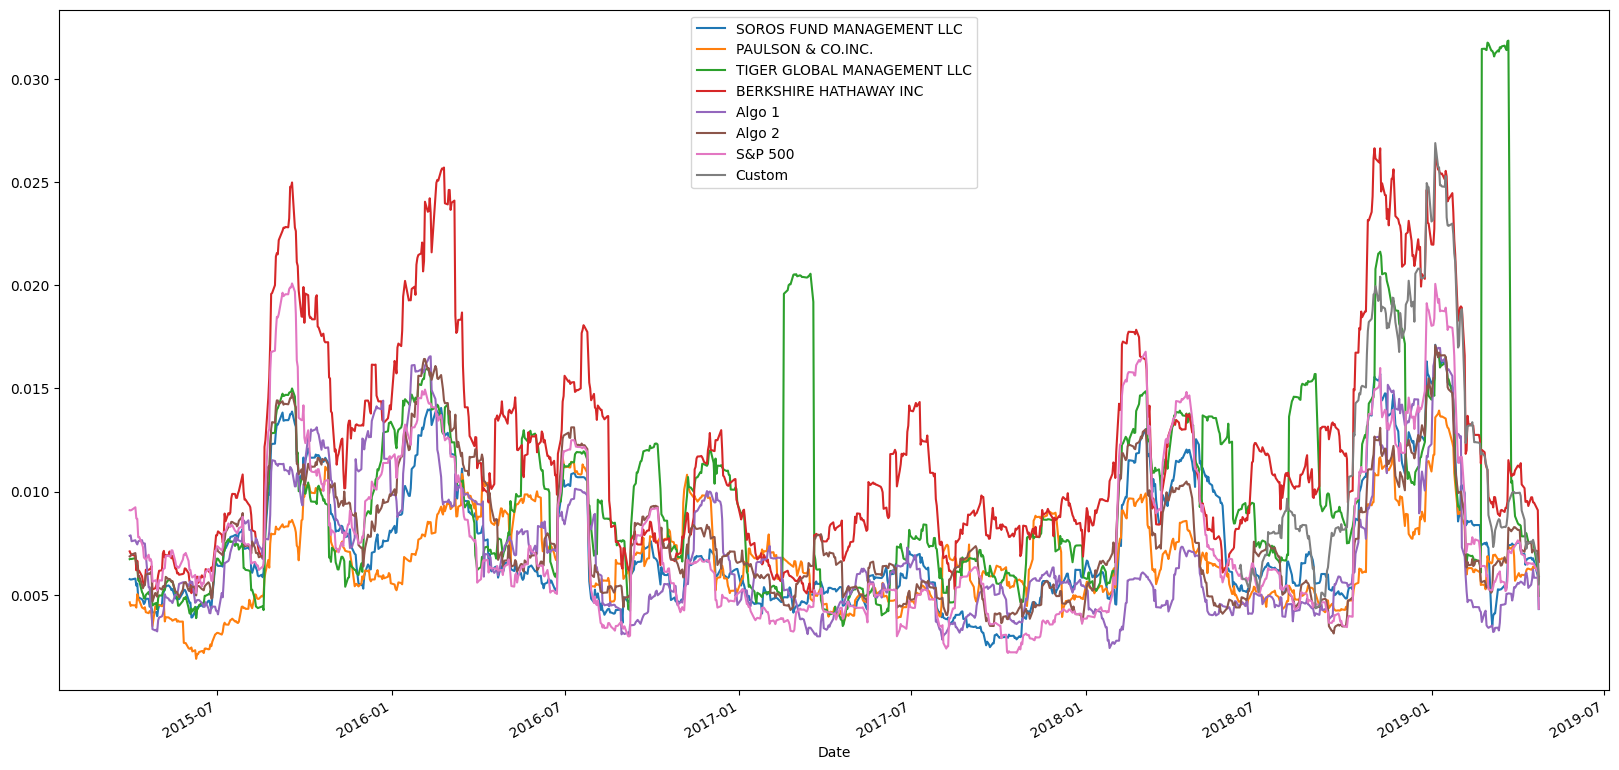

In [45]:
# Calculate rolling standard deviation
port_annual_std = df_returns.rolling(window=21).std()
# Plot rolling standard deviation
port_annual_std.plot(figsize=(20,10))

### Calculate and plot the correlation

In [46]:
# Calculate and plot the correlation
correlation = df_returns.corr()
correlation.style.background_gradient(cmap='bwr')

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Custom
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864,0.733250
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732,0.644210
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946,0.391972
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371,0.801158
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494,0.261471
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764,0.739936
S&P 500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000,0.871875
Custom,0.733250,0.644210,0.391972,0.801158,0.261471,0.739936,0.871875,1.000000


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<Axes: xlabel='Date'>

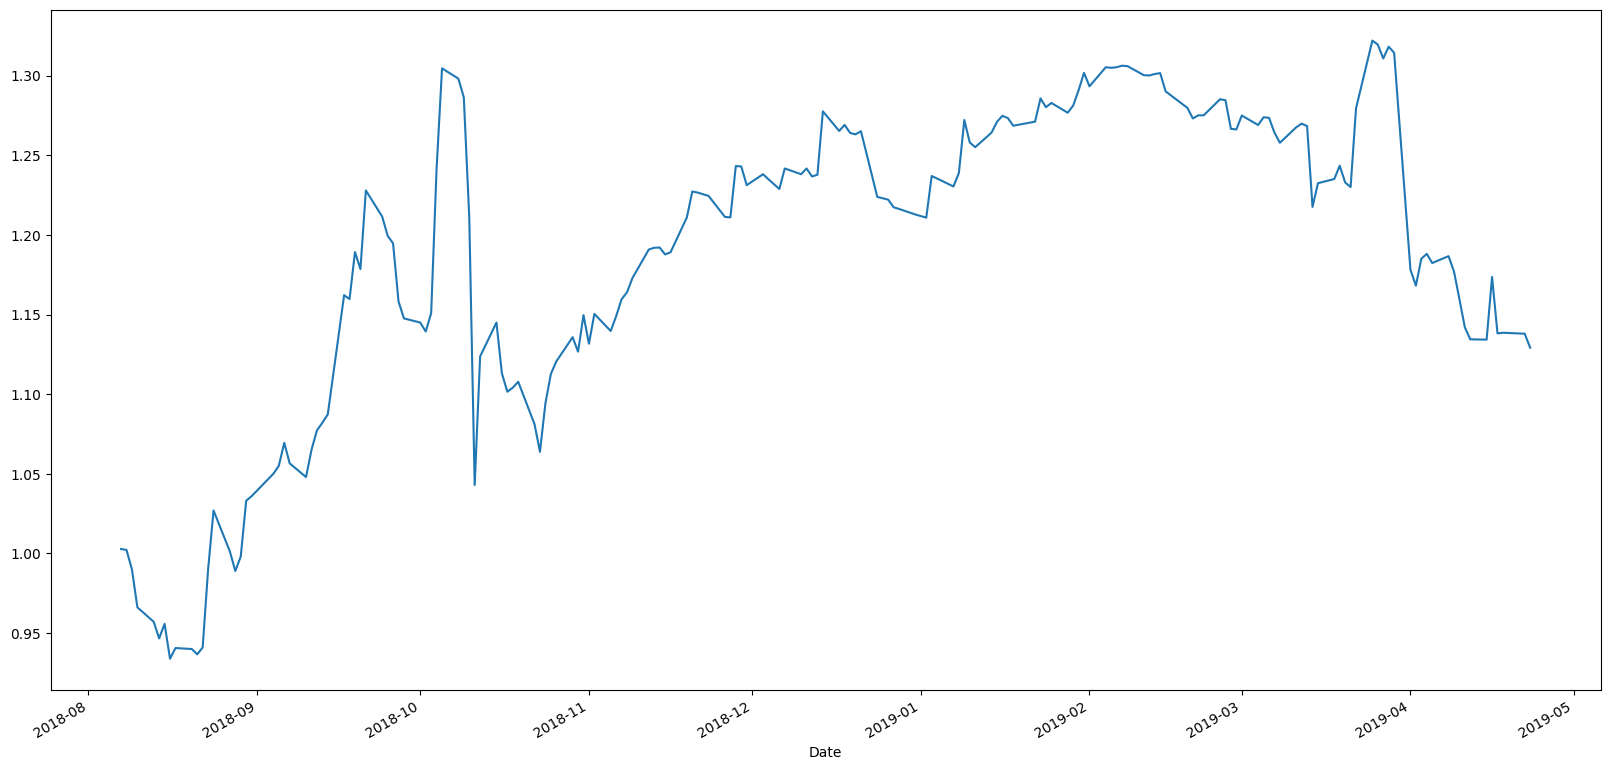

In [58]:
# Calculate and plot Beta
rollin_covariance = df_returns['Custom'].rolling(window=60).cov(df_returns['S&P 500'])
rollin_variance = df_returns['S&P 500'].rolling(window=60).var()
rollin_beta = rollin_covariance / rollin_variance
rollin_beta.plot(figsize=(20, 10))                                                                           

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [61]:
# Calculate Annualized Sharpe Ratios
sharpe_ratios = (df_returns.mean() * 252) / (df_returns.std() * np.sqrt(252))

<Axes: >

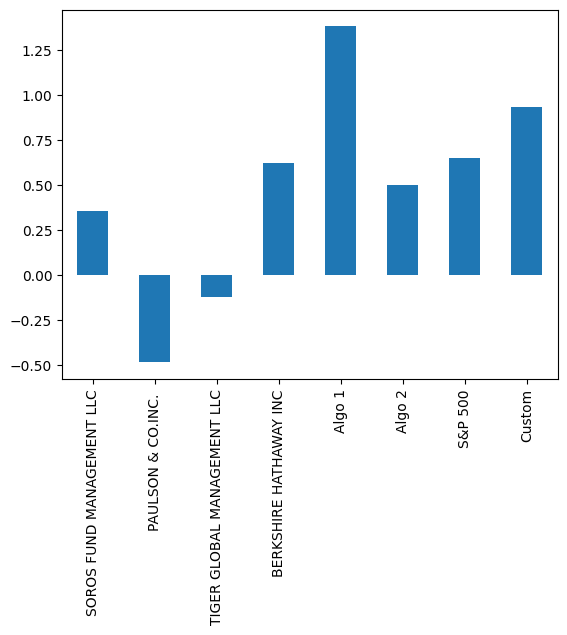

In [62]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind = 'bar')

### How does your portfolio do?

Write your answer here!

In [ ]:
My custom protfolio does well with only one protfolio doing better then mine and that is ALGO 1.